In [1]:
import cv2

In [2]:

img_path = './rgb_000001.png'
image_bgr = cv2.imread(img_path)
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Function to be called on mouse events
def click_event(event, x, y, flags, param):
   if event == cv2.EVENT_LBUTTONDOWN:  # Left button click
        print(f"Point selected: ({x}, {y})")
        cv2.circle(temp_img, (x, y), radius=1, color=(0, 255, 0), thickness=-1)  # Mark the selected point on the temp image
        cv2.imshow('image', temp_img)

temp_img = image_bgr.copy()  # Make a temporary copy of the image to draw points on

cv2.imshow('image', image_bgr)

# Set the mouse callback function for the window
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)  # Wait for a key press to exit
cv2.destroyAllWindows()

Point selected: (583, 357)
Point selected: (857, 287)
Point selected: (542, 202)
Point selected: (456, 265)
Point selected: (732, 481)


In [10]:

import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
    
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.2.1+cu118
Torchvision version: 0.17.1+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-7zx95phv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-7zx95phv
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
mkdir: cannot create directory ‘images’: File exists
--2024-04-18 14:50:20--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271475 (265K) [image/jpeg]
Saving to: 'images/truck.jpg.1

In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [12]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [13]:
image = cv2.imread('images/truck.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

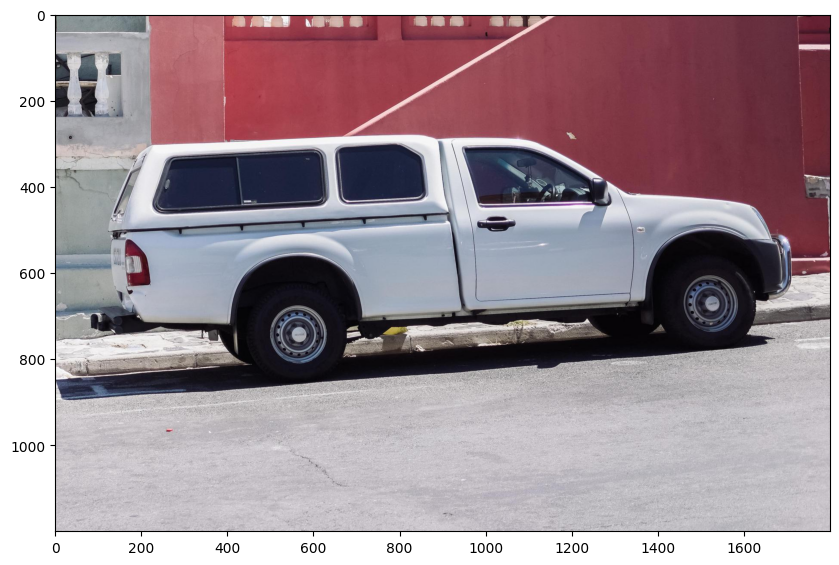

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [15]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [16]:
predictor.set_image(image)

In [28]:
# image_bgr = cv2.imread(img_path)
# image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Function to be called on mouse events
input_pt = []
def click_event(event, x, y, flags, param):
   if event == cv2.EVENT_LBUTTONDOWN:  # Left button click
        print(f"Point selected: ({x}, {y})")
        input_pt.append([x,y])
        cv2.circle(temp_img, (x, y), radius=1, color=(0, 255, 0), thickness=-1)  # Mark the selected point on the temp image
        cv2.imshow('image', temp_img)

temp_img = image.copy()  # Make a temporary copy of the image to draw points on

cv2.imshow('image', image)

# Set the mouse callback function for the window
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)  # Wait for a key press to exit
cv2.destroyAllWindows()

Point selected: (404, 321)
Point selected: (428, 430)
Point selected: (592, 434)
Point selected: (608, 331)
Point selected: (512, 110)
Point selected: (662, 150)


In [23]:
input_pt

[[524, 377]]

In [24]:
input_point = np.array(input_pt)
input_label = np.array([1])

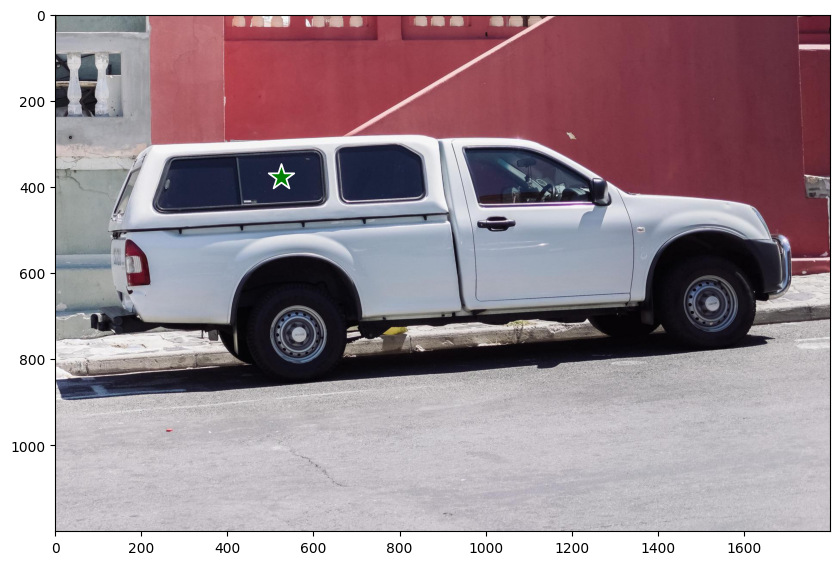

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [26]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

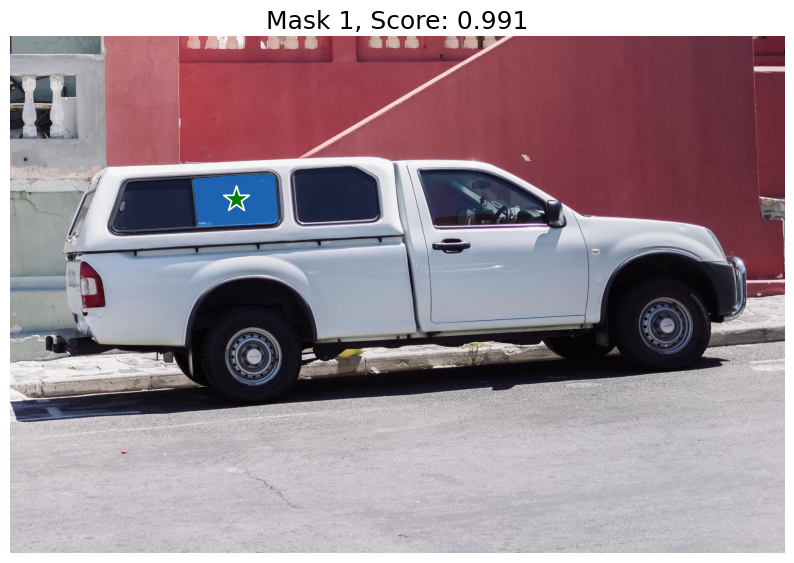

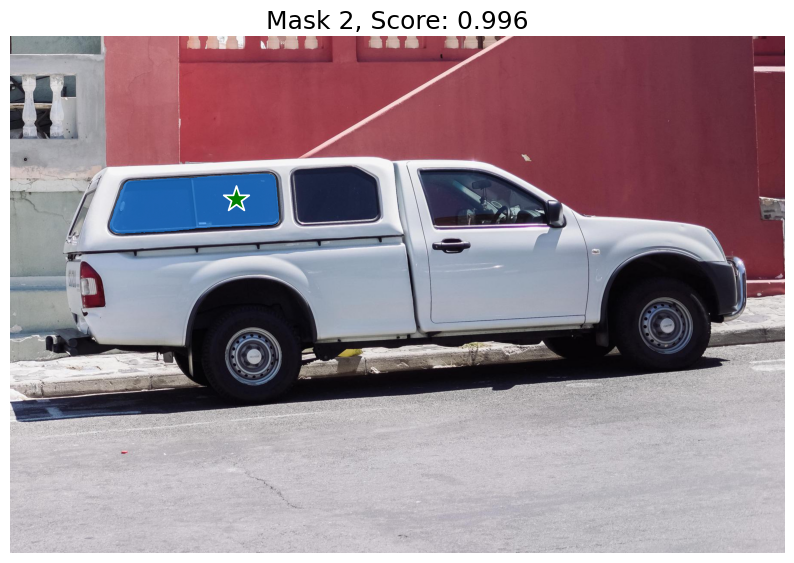

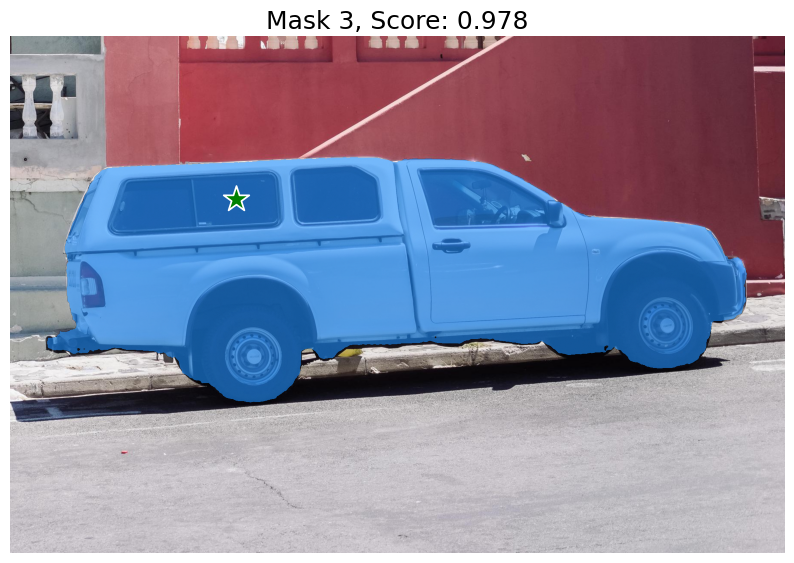

In [27]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  